In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [28]:
df = pd.read_csv(r'/Users/sinchanasuresh/Desktop/Project/Diwali Sales Project/Diwali Sales Data.csv',encoding ='unicode_escape')
#to avoid encoding error, use 'unicode_escape'

In [29]:
df.shape

(11251, 15)

In [30]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [32]:
# dropping blank columns
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [33]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [34]:
# dropping null values
df.dropna(inplace = True)

In [35]:
df.shape

(11239, 13)

In [36]:
# change the data type of columns
df['Amount'] = df['Amount'].astype('int')

In [38]:
df['Amount'].dtypes

dtype('int64')

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [41]:
#rename columns
df.rename(columns ={'Marital_Status':'Shaadi_Status'}).head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [42]:
# describe() method returns description of data ( i.e count, mean, std)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [44]:
#describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [53]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

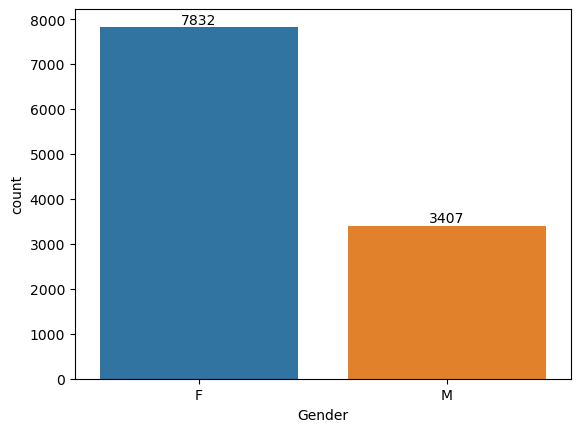

In [64]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

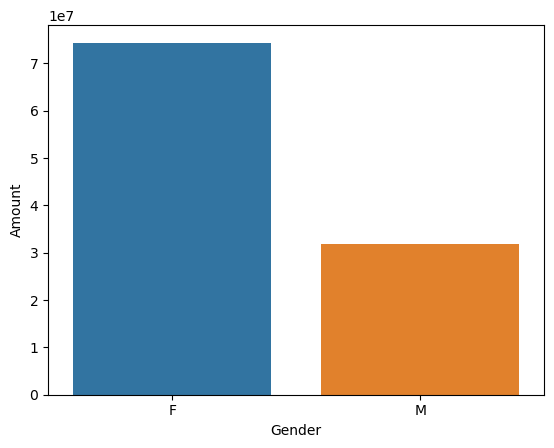

In [67]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

bx = sns.barplot(x = 'Gender',y = 'Amount',data = sales_gen)

<p> Based on the generated graphs, its evident that the majority of customers 
are female.
The femal purchasing power surpasses that of males.</p>

### Age

In [79]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

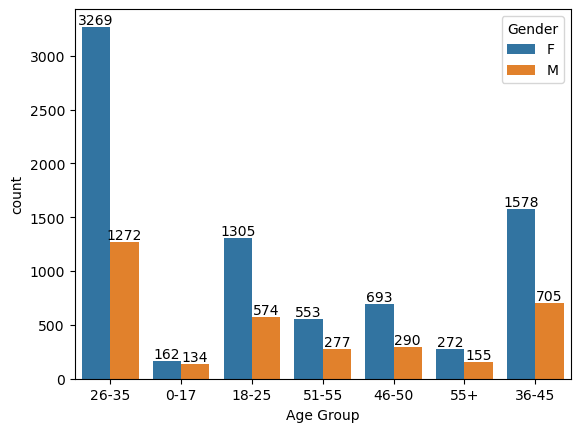

In [85]:
g = sns.countplot(x = 'Age Group',hue = 'Gender',data = df)

for bar in g.containers:
    g.bar_label(bar)

Text(0.5, 1.0, 'Count of Products in Each Category')

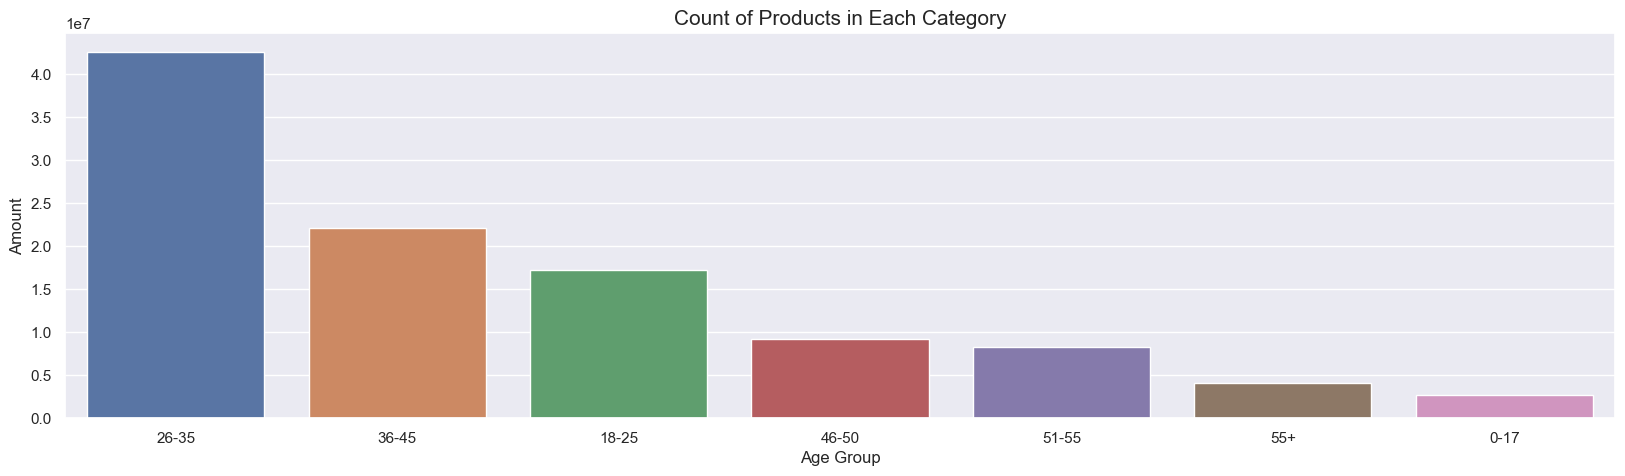

In [163]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount',data = sales_age )

<p> The visual representation indicates that the predominant age group among buyers is 26-35 years, and specifically, the majority of buyers falling into this age range are females. </p>

### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

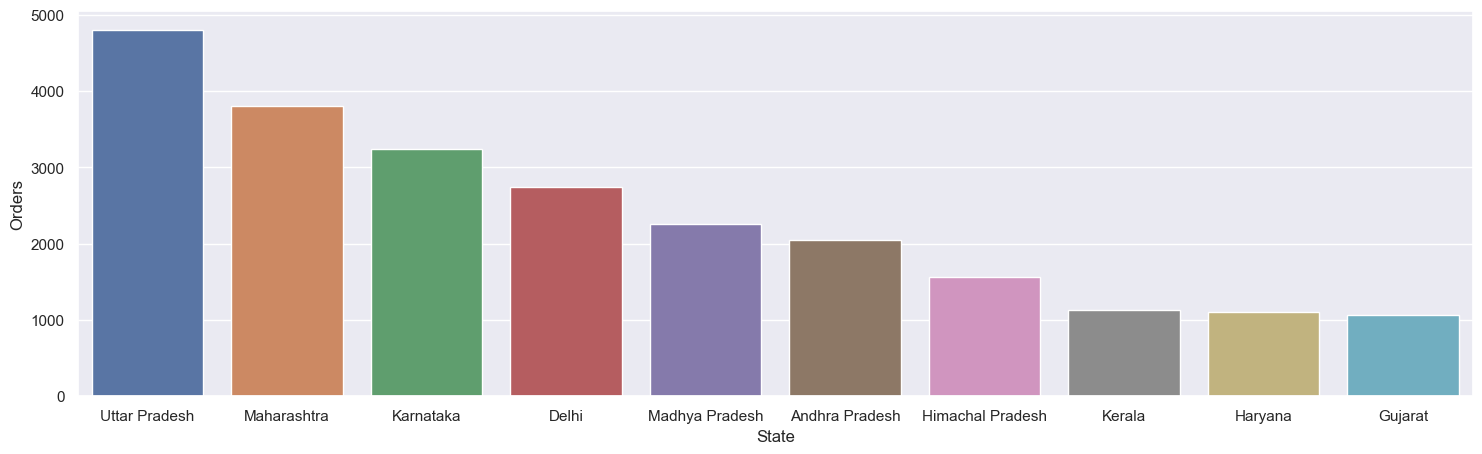

In [100]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc ={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y = 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

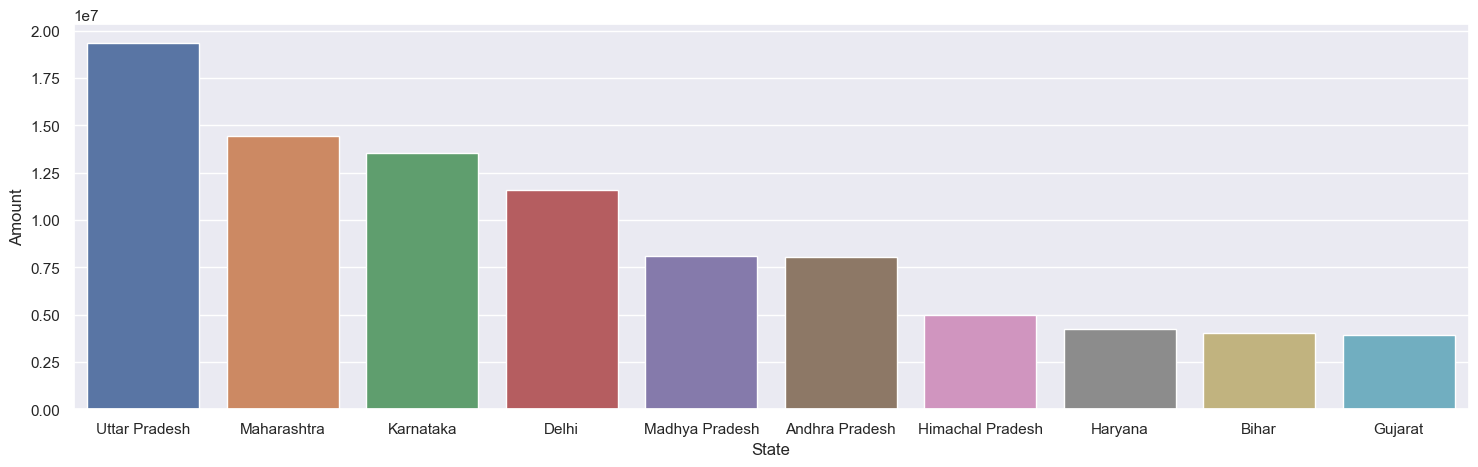

In [99]:
#total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<p> The graphical analysis reveals that the primary contributors to both order volume and total sales/amount are customers hailing from Uttar Pradesh, Maharashtra, and Karnataka, respectively. </p>

### Marital Status

[Text(0, 0, 'Married'), Text(1, 0, 'Unmarried')]

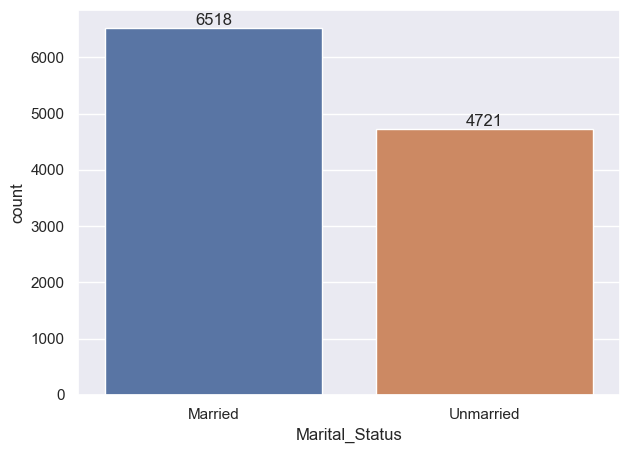

In [106]:
ax = sns.countplot(data = df, x = 'Marital_Status')

#sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    
ax.set_xticklabels(['Married', 'Unmarried',])

[Text(0, 0, 'Married'), Text(1, 0, 'Unmarried')]

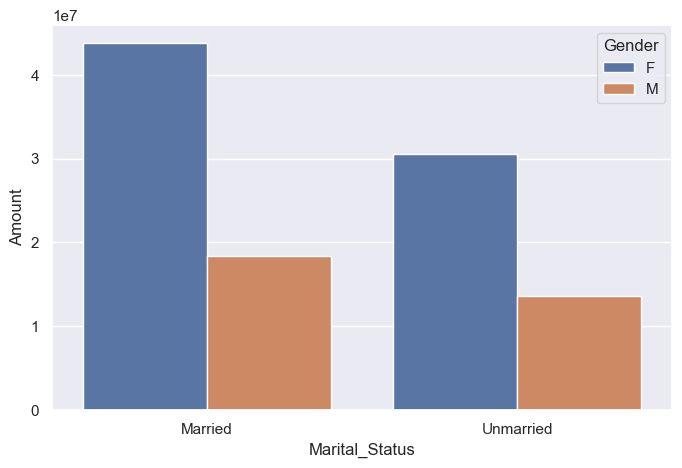

In [109]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(8,5)})
v = sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

v.set_xticklabels(['Married', 'Unmarried',])

<p> The visual representation suggests that the predominant group of buyers comprises married women, and notably, this demographic exhibits significant purchasing power. </p>

### Occupation

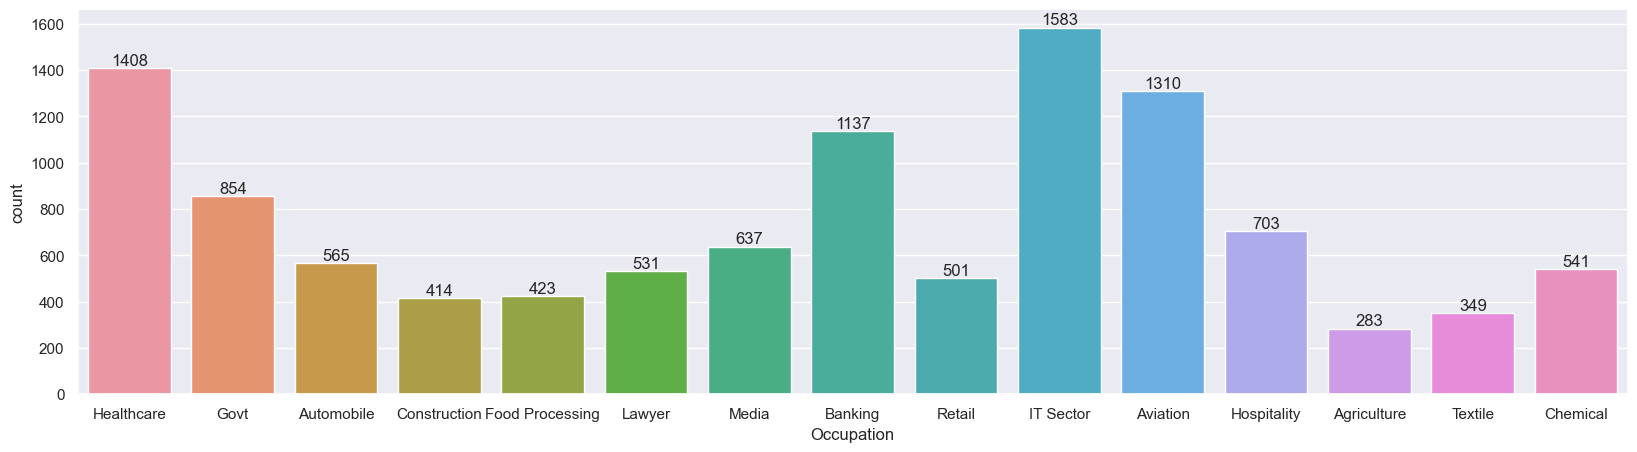

In [116]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

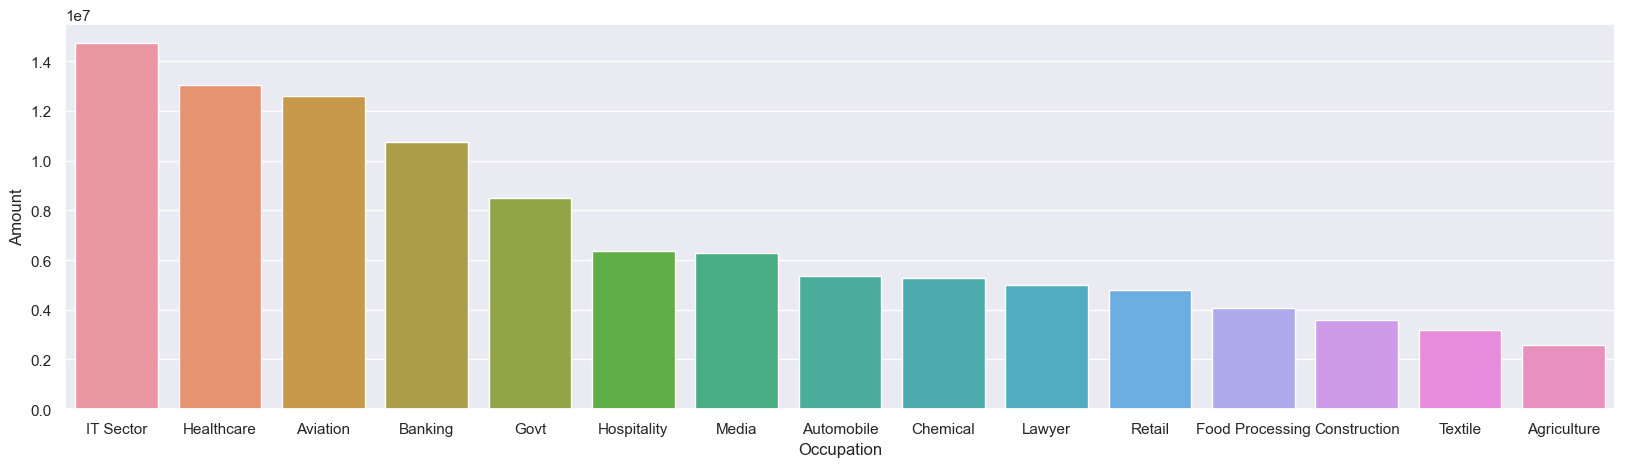

In [117]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')


<p> The graphical analysis indicates that the majority of buyers are employed in the IT, Healthcare, and Aviation sectors.  </p>

### Product Category

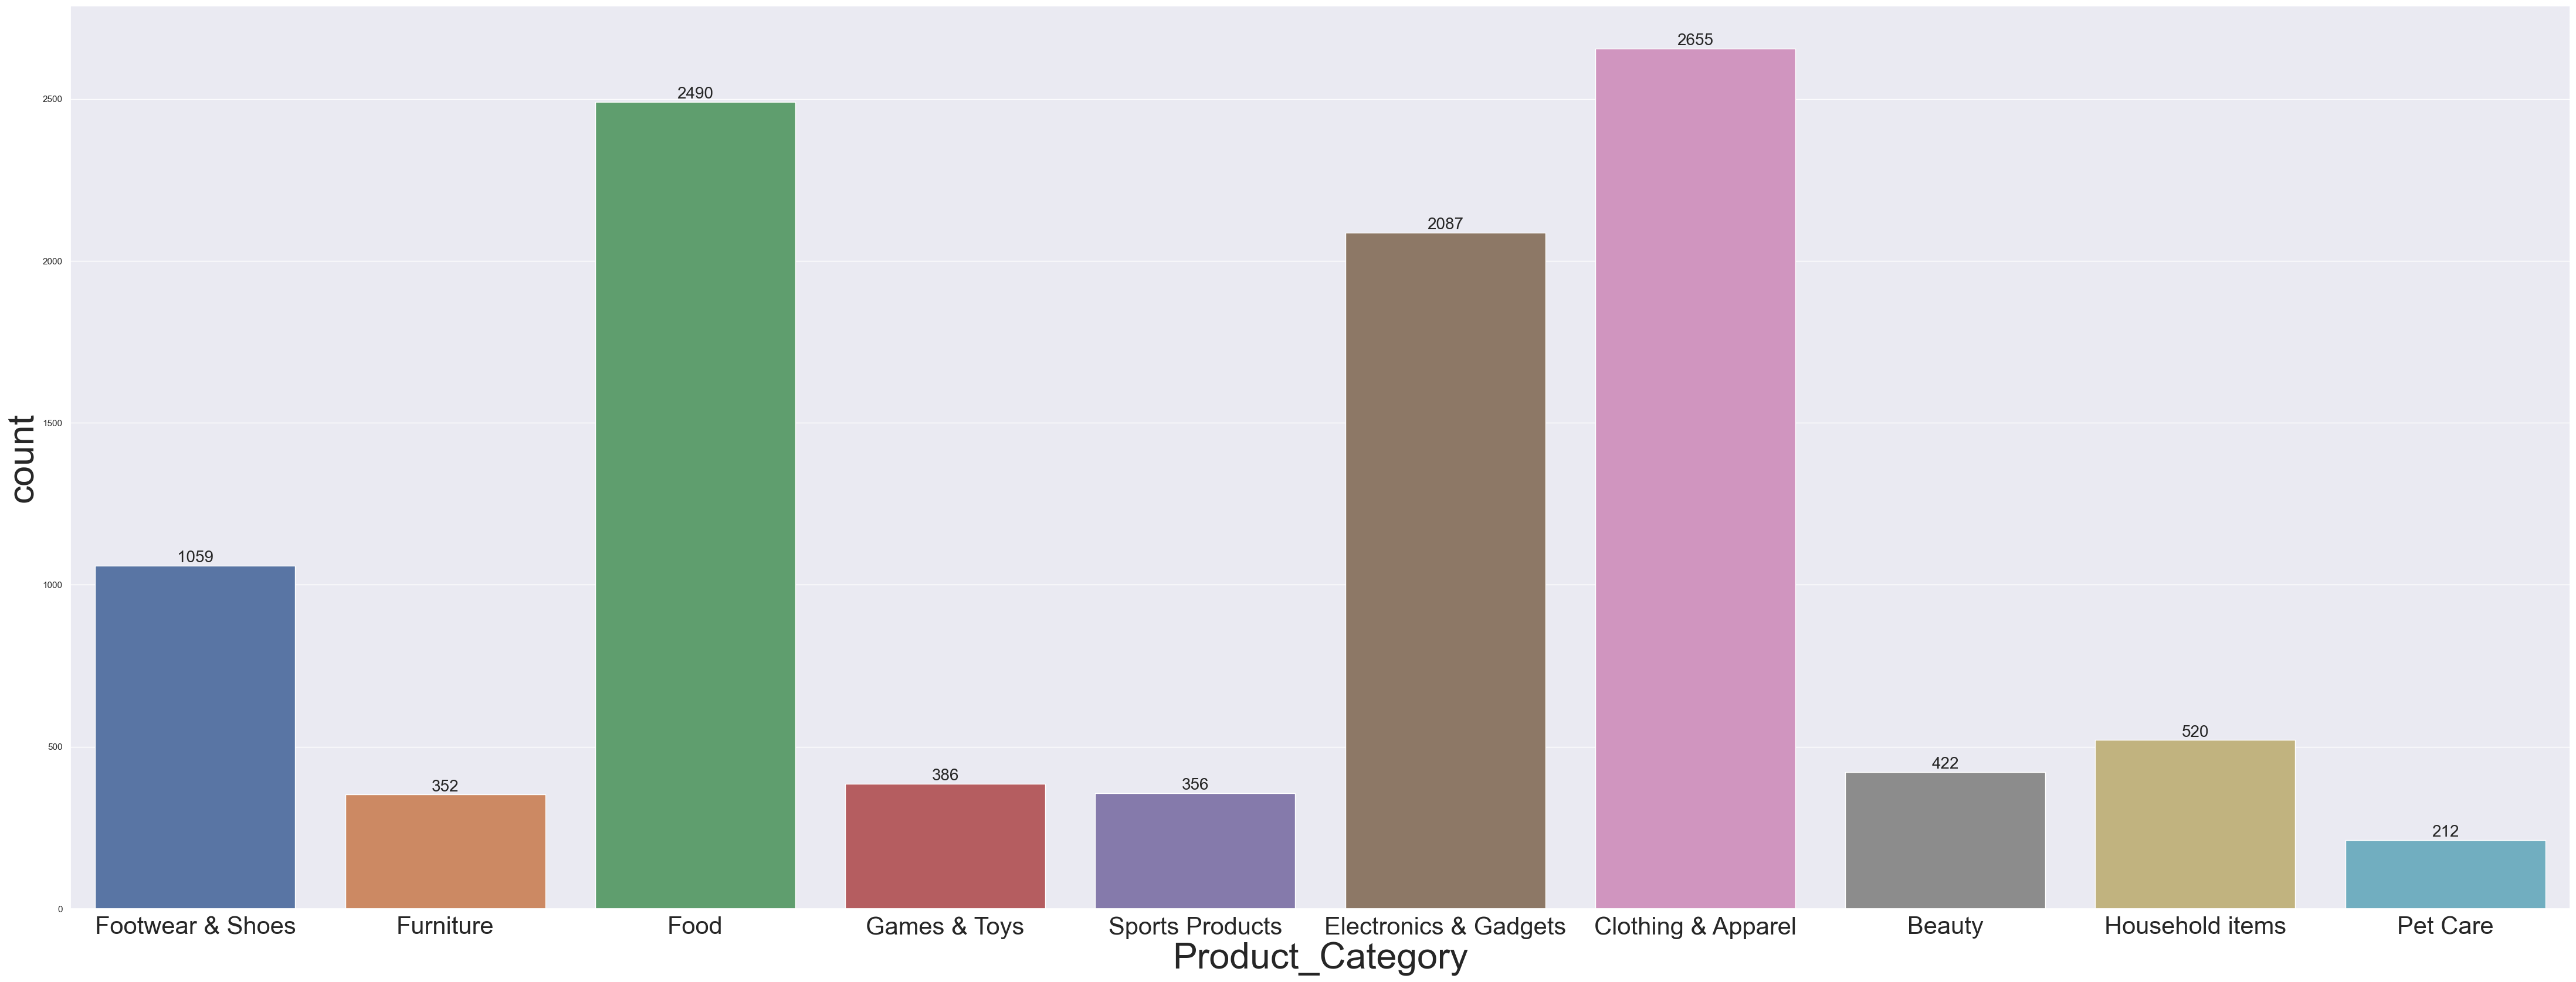

In [161]:
sns.set(rc={'figure.figsize': (55, 20), 'axes.labelsize': 45})

# Select the top 10 product categories
top_categories = df['Product_Category'].value_counts().head(10).index

# Filter the DataFrame for the top 10 categories
df_top10 = df[df['Product_Category'].isin(top_categories)]
ax = sns.countplot(data=df_top10, x='Product_Category')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=20)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=30)
plt.show()

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

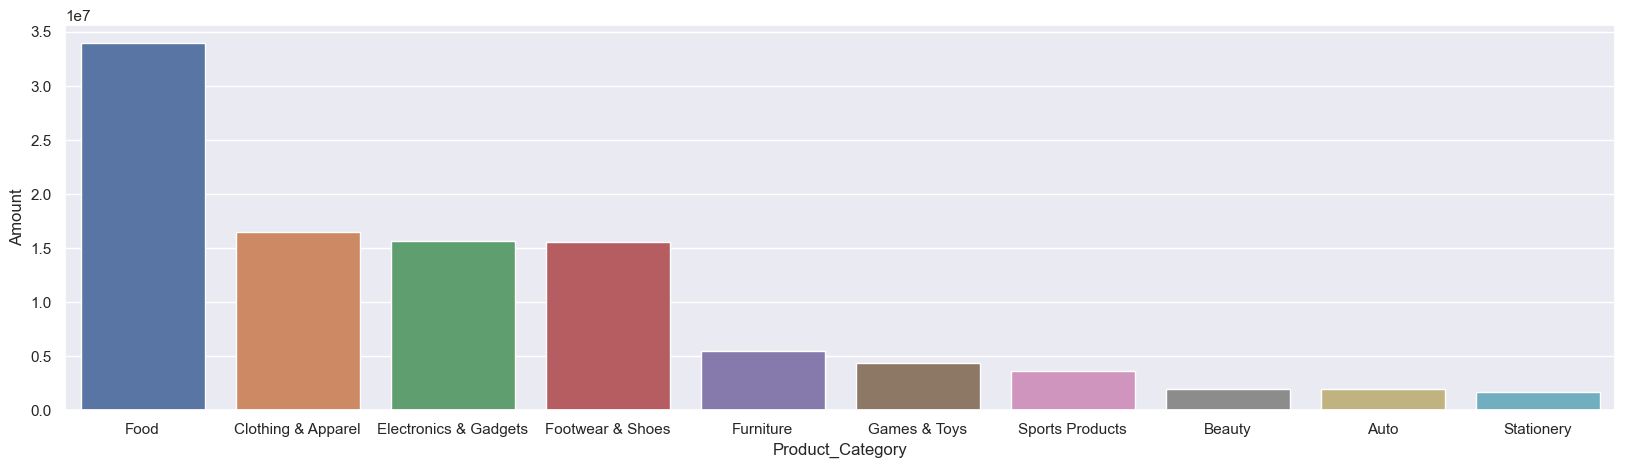

In [162]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<p> The visual analysis highlights that the predominant product categories in terms of sales are Food, Clothing, and Electronics. </p>

# Conclusion

<p> Women in the age group of 26-35, residing in the states of Uttar Pradesh, Maharashtra, and Karnataka,
who are married and employed in the IT, Healthcare, and Aviation industries, show a higher inclination 
to purchase items falling under the categories of Food, Clothing, and Electronics.</p>